In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

(255, 255, 3)


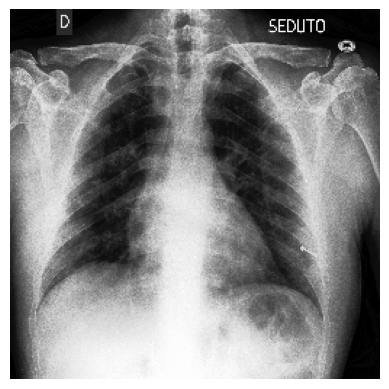

In [ ]:

img=cv.imread("/content/drive/MyDrive/proindian/Covid19-dataset/train/Covid/01.jpeg")
img=cv.resize(img,[255,255])
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

(255, 255, 3)


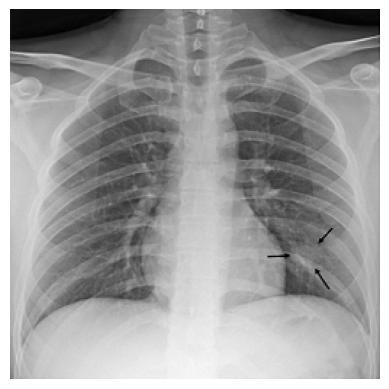

In [ ]:
img=cv.imread("/content/drive/MyDrive/proindian/Covid19-dataset/test/Covid/0111.jpg")
img=cv.resize(img,[255,255])
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

(255, 255, 3)


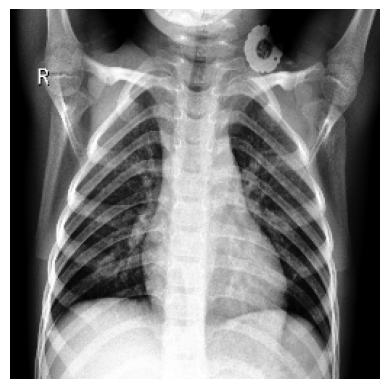

In [ ]:
img=cv.imread("/content/drive/MyDrive/proindian/Covid19-dataset/test/Normal/0107.jpeg")
img=cv.resize(img,[255,255])
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
Covidlist=os.listdir("/content/drive/MyDrive/proindian/Covid19-dataset/train/Covid")
Normal=os.listdir("/content/drive/MyDrive/proindian/Covid19-dataset/train/Normal")
Viral_Pneumonia=os.listdir("/content/drive/MyDrive/proindian/Covid19-dataset/train/Viral Pneumonia")

**Classifying the Images**

In [ ]:
x=list()
y=list()
for i in  Covidlist:
    img=cv.imread("/content/drive/MyDrive/proindian/Covid19-dataset/train/Covid/"+i)
    img=cv.resize(img,[256,256])
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    x.append(img)
    y.append(2)
print("completed")
for i in Viral_Pneumonia:
    img=cv.imread("/content/drive/MyDrive/proindian/Covid19-dataset/train/Viral Pneumonia/"+i)
    img=cv.resize(img,[256,256])
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    x.append(img)
    y.append(1)
print("completed")
for i in Normal:
    img=cv.imread("/content/drive/MyDrive/proindian/Covid19-dataset/train/Normal/"+i)
    img=cv.resize(img,[256,256])
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    x.append(img)
    y.append(0)
print("completed")
x=np.array(x)
y=np.array(y)

completed
completed
completed


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=5,test_size=0.2)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

**Training with CNN**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Create a CNN model
model = keras.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256,1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu',),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='leaky_relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='leaky_relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='leaky_relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(3, activation='softmax')
])
# # Define the desired learning rate
# learning_rate = 0.7

# # Create an optimizer with the desired learning rate
# optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# Compile the model with the optimizer
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 254, 254, 16)      160       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 30, 30, 64)      

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stop],shuffle=True)

Epoch 1/10
7/7 [==============================] - 25s 3s/step - loss: 17.6905 - accuracy: 0.3250 - val_loss: 6.5154 - val_accuracy: 0.2745
Epoch 2/10
7/7 [==============================] - 18s 3s/step - loss: 3.6515 - accuracy: 0.3500 - val_loss: 1.1306 - val_accuracy: 0.3725
Epoch 3/10
7/7 [==============================] - 19s 3s/step - loss: 1.5154 - accuracy: 0.3750 - val_loss: 1.0211 - val_accuracy: 0.5294
Epoch 4/10
7/7 [==============================] - 19s 3s/step - loss: 0.9795 - accuracy: 0.4900 - val_loss: 0.9262 - val_accuracy: 0.7059
Epoch 5/10
7/7 [==============================] - 18s 3s/step - loss: 0.8403 - accuracy: 0.6450 - val_loss: 2.4411 - val_accuracy: 0.4902
Epoch 6/10
7/7 [==============================] - 17s 3s/step - loss: 1.0350 - accuracy: 0.6650 - val_loss: 1.0353 - val_accuracy: 0.6863
Epoch 7/10
7/7 [==============================] - 19s 3s/step - loss: 0.7307 - accuracy: 0.7200 - val_loss: 0.6861 - val_accuracy: 0.7647
Epoch 8/10
7/7 [=================

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)
model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/30
7/7 [==============================] - 21s 3s/step - loss: 0.3956 - accuracy: 0.8550 - val_loss: 0.4237 - val_accuracy: 0.8039
Epoch 2/30
7/7 [==============================] - 17s 3s/step - loss: 0.3151 - accuracy: 0.8750 - val_loss: 0.4279 - val_accuracy: 0.8039
Epoch 3/30
7/7 [==============================] - 18s 3s/step - loss: 0.3048 - accuracy: 0.8750 - val_loss: 0.3917 - val_accuracy: 0.8235
Epoch 4/30
7/7 [==============================] - 18s 3s/step - loss: 0.3876 - accuracy: 0.8700 - val_loss: 0.3117 - val_accuracy: 0.8431
Epoch 5/30
7/7 [==============================] - 20s 3s/step - loss: 0.2950 - accuracy: 0.8950 - val_loss: 0.3555 - val_accuracy: 0.8235
Epoch 6/30
7/7 [==============================] - 18s 3s/step - loss: 0.2526 - accuracy: 0.9150 - val_loss: 0.3762 - val_accuracy: 0.8431
Epoch 7/30
7/7 [==============================] - 18s 3s/step - loss: 0.2347 - accuracy: 0.9150 - val_loss: 0.3486 - val_accuracy: 0.8235


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=6)
model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/40
7/7 [==============================] - 18s 3s/step - loss: 0.2557 - accuracy: 0.9100 - val_loss: 0.3011 - val_accuracy: 0.8627
Epoch 2/40
7/7 [==============================] - 19s 3s/step - loss: 0.2436 - accuracy: 0.9150 - val_loss: 0.5853 - val_accuracy: 0.8431
Epoch 3/40
7/7 [==============================] - 21s 3s/step - loss: 0.2499 - accuracy: 0.9050 - val_loss: 0.3127 - val_accuracy: 0.8824
Epoch 4/40
7/7 [==============================] - 18s 3s/step - loss: 0.3371 - accuracy: 0.8800 - val_loss: 0.2620 - val_accuracy: 0.8824
Epoch 5/40
7/7 [==============================] - 18s 3s/step - loss: 0.1965 - accuracy: 0.9200 - val_loss: 0.3337 - val_accuracy: 0.8824
Epoch 6/40
7/7 [==============================] - 18s 3s/step - loss: 0.2176 - accuracy: 0.9250 - val_loss: 0.4609 - val_accuracy: 0.8235
Epoch 7/40
7/7 [==============================] - 20s 3s/step - loss: 0.1732 - accuracy: 0.9500 - val_loss: 0.4694 - val_accuracy: 0.8235
Epoch 8/40
7/7 [==================

In [ ]:
model.save("Lung_covid.h5")

Testing the Image on the Model

(256, 256)


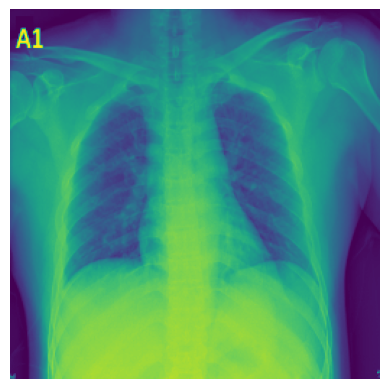

1/1 [==============================] - 0s 50ms/step
Covid


In [ ]:
img=cv.imread("/content/drive/MyDrive/proindian/Covid19-dataset/test/Covid/0105.png")
img=cv.resize(img,[256,256])
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
p1=img.reshape(1,256,256)
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()
arrayforouput=model.predict(p1)
classa=arrayforouput.argmax()
if(classa==0):
    print("Normal")
elif(classa==1):
    print("viral Pheumonia")
else:
    print("Covid")